# KMean Clustering and PCA combined

What defines a bird's personality?



We are going to use the AngryBirds.xlsx data. This dataset models different personality types of northern cardinals finches from different environments.



We will demonstrate the following:



1. Running a KMean Cluster Analysis

2. Running PCA to reduce the dimensionility and visualize the data.

In [1]:
# Import packages

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D

## Step 1: Understand the data



Lets load the data file and examine it.

In [2]:
df_source = pd.read_csv('BirdsPersonality.csv')



df = df_source.copy()

df.shape

(67, 18)

In [3]:
df.head()

,Month,Habitat,Site,Location,Sex,SexID,Weight,WingL,TarsusL,CORT1,CORT2,CORT3,Exploration,Neophobia,Neophilia,Aggression,Boldness,Personality
0,Feb,Rural,Ocala,Farm,M,2,35,9.1,21.76,5.23,5.86,6.25,0.87026,1.85823,0.83398,0.43279,-1.35431,Angry
1,Sept,Urban,GNV,GNV,F,1,37,8.4,20.09,3.05,5.08,7.26,1.46306,-0.60086,-0.92405,0.72763,1.08221,Angry
2,Feb,Urban,Ocala,Ocala,F,1,37,8.6,19.50,8.73,10.48,19.49,1.94799,-0.05401,0.24467,-1.89158,-0.18457,Chill
3,Dec,Rural,GNV,ACF,F,1,37,8.4,19.36,11.11,23.60,24.87,0.06201,-0.54020,0.17969,0.04281,1.08080,Standard
4,Nov,Urban,GNV,GNV,F,1,38,8.4,19.01,1.33,1.39,39.82,-0.96196,0.30524,-0.45602,-0.23742,0.56366,Chill


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        67 non-null     object 
 1   Habitat      67 non-null     object 
 2   Site         67 non-null     object 
 3   Location     67 non-null     object 
 4   Sex          67 non-null     object 
 5   SexID        67 non-null     int64  
 6   Weight       67 non-null     int64  
 7   WingL        67 non-null     float64
 8   TarsusL      67 non-null     float64
 9   CORT1        67 non-null     float64
 10  CORT2        67 non-null     float64
 11  CORT3        67 non-null     float64
 12  Exploration  67 non-null     float64
 13  Neophobia    67 non-null     float64
 14  Neophilia    67 non-null     float64
 15  Aggression   67 non-null     float64
 16  Boldness     67 non-null     float64
 17  Personality  67 non-null     object 
dtypes: float64(10), int64(2), object(6)
memory usage: 9.

In [5]:
# Check for Duplicates, NaN or Nulls

print(

    'DUP=[', f'{df.duplicated().sum()}]',   '\n',

    'NA=[',   '\n',  f'{df.isna().sum()}]', '\n',

    'NULL=[', '\n',  f'{df.isnull().sum()}]'      

)

DUP=[ 0] 
 NA=[ 
 Month          0
Habitat        0
Site           0
Location       0
Sex            0
SexID          0
Weight         0
WingL          0
TarsusL        0
CORT1          0
CORT2          0
CORT3          0
Exploration    0
Neophobia      0
Neophilia      0
Aggression     0
Boldness       0
Personality    0
dtype: int64] 
 NULL=[ 
 Month          0
Habitat        0
Site           0
Location       0
Sex            0
SexID          0
Weight         0
WingL          0
TarsusL        0
CORT1          0
CORT2          0
CORT3          0
Exploration    0
Neophobia      0
Neophilia      0
Aggression     0
Boldness       0
Personality    0
dtype: int64]


In [6]:
df.describe()

,SexID,Weight,WingL,TarsusL,CORT1,CORT2,CORT3,Exploration,Neophobia,Neophilia,Aggression,Boldness
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01
mean,1.492537,40.671642,8.605970,20.667164,4.209701,8.881791,15.060299,1.657049e-17,1.492537e-07,2.985075e-07,1.492537e-07,-1.492537e-07
std,0.503718,2.518947,0.357974,1.045023,2.675439,6.181532,8.561059,9.999999e-01,9.999994e-01,1.000000e+00,9.999992e-01,9.999996e-01
min,1.000000,35.000000,7.600000,17.580000,0.130000,1.380000,5.080000,-1.231380e+00,-2.937040e+00,-1.940980e+00,-1.891580e+00,-1.594870e+00
25%,1.000000,39.000000,8.400000,19.970000,1.690000,5.210000,7.595000,-7.733250e-01,-5.402800e-01,-6.500950e-01,-3.805450e-01,-9.162250e-01
50%,1.000000,41.000000,8.700000,20.700000,4.100000,7.440000,13.090000,-2.074800e-01,-4.791300e-01,-2.092100e-01,2.960800e-01,1.542300e-01
75%,2.000000,42.000000,8.800000,21.385000,6.180000,11.115000,20.370000,5.738450e-01,2.118050e-01,6.939150e-01,6.240850e-01,1.079155e+00
max,2.000000,48.000000,9.200000,22.800000,11.180000,33.140000,39.820000,2.648480e+00,1.875240e+00,2.558570e+00,1.491730e+00,1.086430e+00


In [7]:
# Check for unique personality types

df_personality = df.groupby('Personality', observed=False).size()

df_personality

Personality
Angry       20
Chill       19
Standard    28
dtype: int64

## Step 2: Data Preprocessing

In [8]:
# Convert columns to categorical

for column in df.select_dtypes(include=['object']).columns:

    # change column to categorical

    df[column] = pd.Categorical(df[column])

In [9]:
# Encode all categorical columns except Personality using LabelEncoder

encoder = LabelEncoder()

df['HabitatId'] = encoder.fit_transform(df['Habitat'])

df['SiteId'] = encoder.fit_transform(df['Site'])

df['LocationId'] = encoder.fit_transform(df['Location'])

df['MonthId'] = encoder.fit_transform(df['Month'])



# For supporting color encoding in our 3D plots

PersonalityId = encoder.fit_transform(df['Personality'])

In [10]:
# Select all numerical features and apply standardization

scaler = StandardScaler()

df_encoded_features = df.select_dtypes(include=['float', 'int'])

scaled_features = scaler.fit_transform(df_encoded_features)

## Step 3: Initial 2D & 3D Plot (CORT1, CORT2, CORT3 with Personality)

In [11]:
# Set global font settings with rcParams for plots

sns.set_theme(style='whitegrid', palette='colorblind')



plt.rcParams['font.family'] = 'Serif'   # Set font family

plt.rcParams['font.size'] = 12          # Set general font size

plt.rcParams['axes.labelsize'] = 14     # Font size for axis labels

plt.rcParams['axes.labelcolor'] = 'purple'

plt.rcParams['axes.titlesize'] = 18     # Font size for the title

plt.rcParams['axes.titlepad'] = 20.0

plt.rcParams['axes.labelpad'] = 15.0

plt.rcParams['axes.titlecolor'] = 'purple'

plt.rcParams['xtick.color'] = 'navy'

plt.rcParams['ytick.color'] = 'navy'

plt.rcParams['legend.fontsize'] = 12  # Font size for legend

plt.rcParams['legend.frameon'] = True

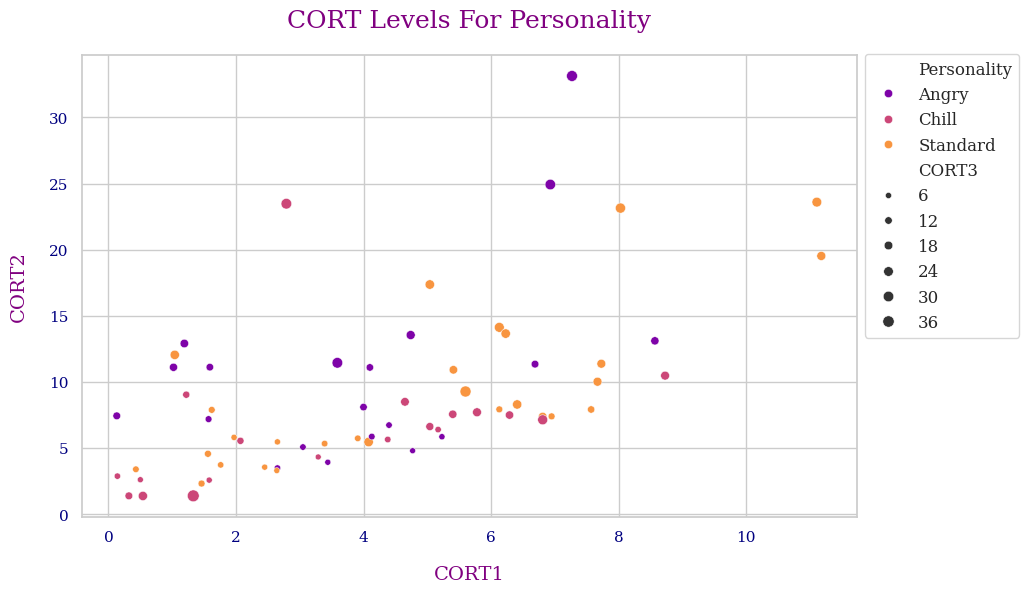

In [12]:
# Create 2D scatter plot for PC1, PC2, and PC3 with Personality

fig = plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='CORT1', y='CORT2', size='CORT3', 

                hue='Personality', palette='plasma')



plt.legend(bbox_to_anchor=(1.00, 1.02))

plt.title('CORT Levels For Personality')

plt.xlabel('CORT1')

plt.ylabel('CORT2')



plt.show()

#fig.savefig('./2d-initial-scatterplot.svg', format='svg', dpi=300)

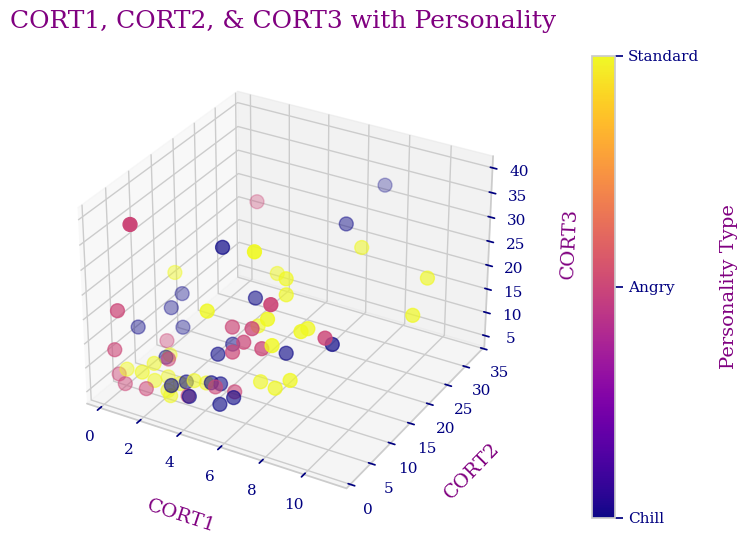

In [13]:
# Create 3D scatter plot for PC1, PC2, and PC3

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['CORT1'], df['CORT2'], df['CORT3'],

                c=PersonalityId, cmap='plasma', s=100)



ax.set_xlabel('CORT1')

ax.set_ylabel('CORT2')

ax.set_zlabel('CORT3')

plt.title('CORT1, CORT2, & CORT3 with Personality')



cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.1)

cbar.set_ticks(ticks=[0, 1, 2],

               labels=['Chill','Angry','Standard'])

cbar.set_label('Personality Type')



plt.show()

#fig.savefig('./3d-initial-scatterplot.svg', format='svg', dpi=300)

### Initial Plot Observation:



**No Clear Trends**, The scatter plot of CORT1, CORT2, and CORT3 against Personality types reveal 3 distinct clusters. This suggests that CORT levels alone are sufficient to classify personality types. However, we will proceed with K-Means clustering to observe further trends.

## Step 4: Elbow Method for K-Means Clustering



Check for Optimum number of Clusters using Elbow Method

In [14]:
# Calculate WCSS for K-Means Clustering (1 to 20 clusters)

wcss = [] # WCSS = With in Cluster Cummulative Sum of Square Distances from Mean

cluster_range = range(1, 21)



for k in cluster_range:

    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

    kmeans.fit(scaled_features) # Only fits the model, doesn't return cluster labels

    wcss.append(kmeans.inertia_) # inertia_ is the WCSS available after fittign the model

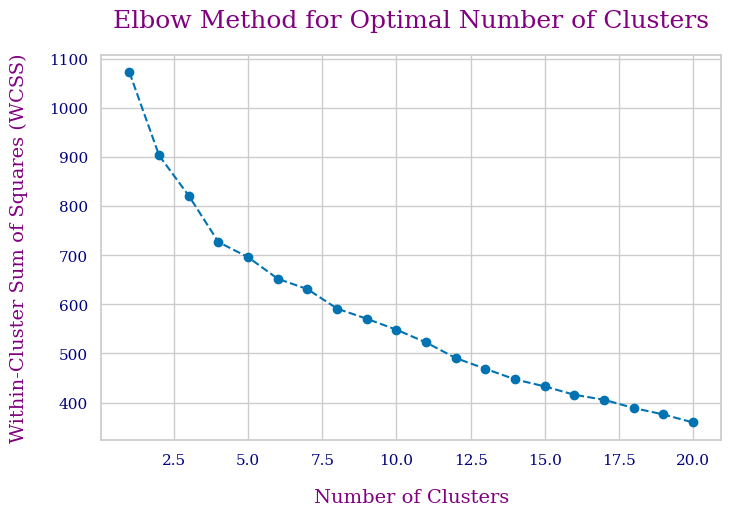

In [15]:
# Plot the Elbow Curve

fig = plt.figure(figsize=(8, 5))

plt.plot(cluster_range, wcss, marker='o', linestyle='--')

plt.title('Elbow Method for Optimal Number of Clusters')

plt.xlabel('Number of Clusters')

plt.ylabel('Within-Cluster Sum of Squares (WCSS)')

plt.grid(True)

plt.show()

#fig.savefig('./elbow-method.svg', format='svg', dpi=300)

### Elbow Method Observation:



**Clear Elbow:** We can observe a clear elbow at 3 Clusters, which is aligned with out 3 personality types. Hence we will run the KMean with 3 clusters

## Step 5: K-Means Clustering with 3 Clusters

In [16]:
# Apply K-Means Clustering with 3 clusters

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')



df['Cluster No'] = kmeans.fit_predict(scaled_features) # Fits the model and assigns cluster labels


### Plot the Scatter and Density plots for different CORT levels with Clusters

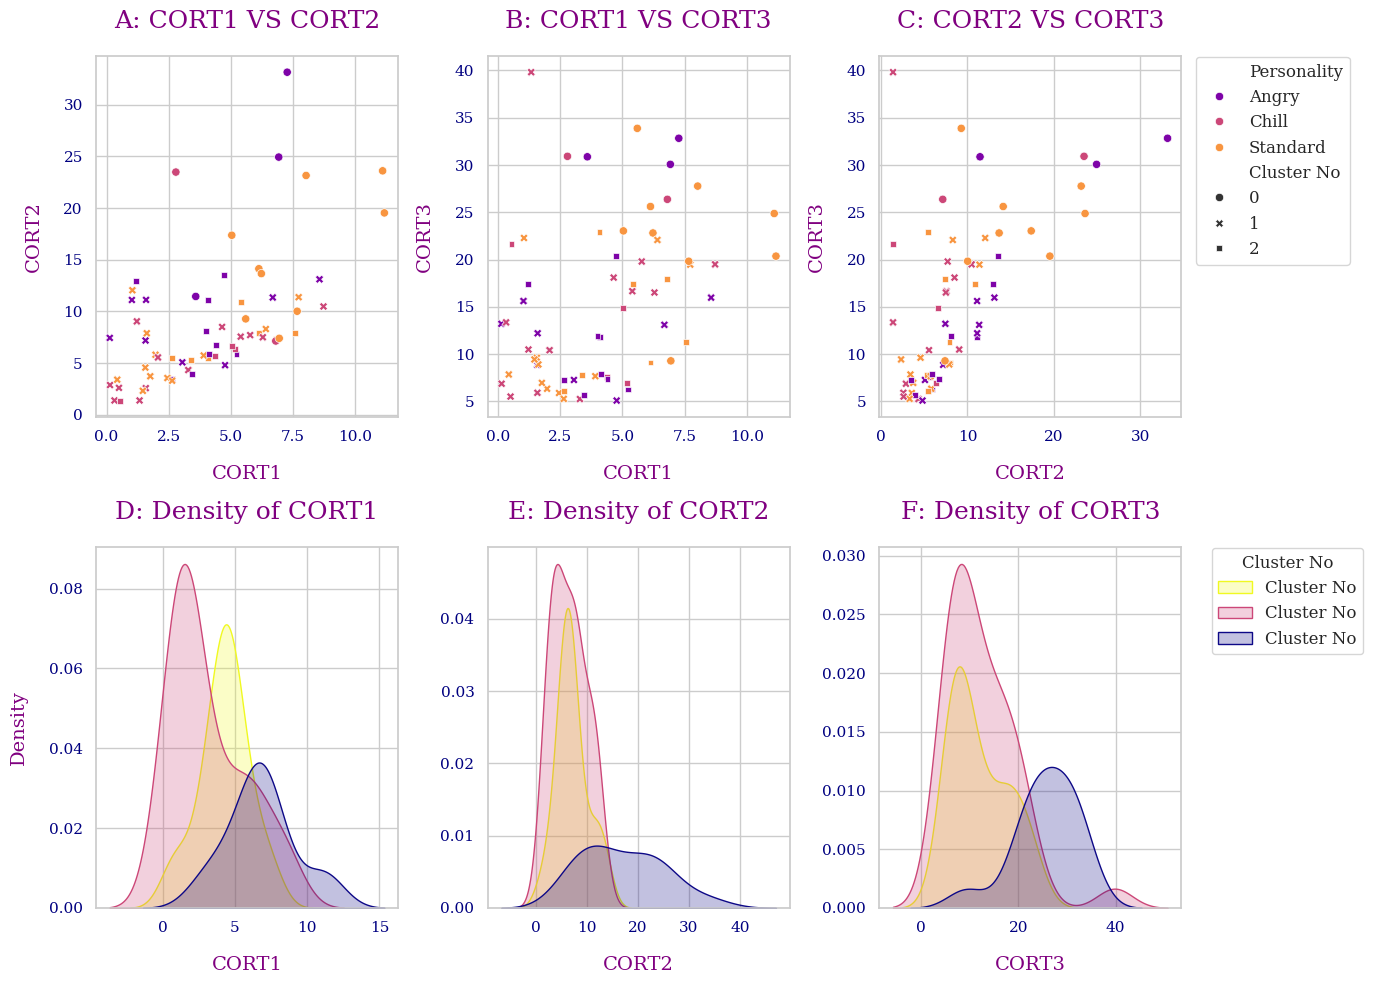

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10))



# Plot 1

sns.scatterplot(data=df, x='CORT1', y='CORT2', style='Cluster No',

                hue='Personality', palette='plasma', ax=axes[0, 0],

                legend=False)

axes[0, 0].set_title('A: CORT1 VS CORT2')

#axes[0, 0].legend().set_visible(False)



# Plot 2

sns.scatterplot(data=df, x='CORT1', y='CORT3', style='Cluster No',

                hue='Personality', palette='plasma', ax=axes[0, 1],

                legend=False)

axes[0, 1].set_title('B: CORT1 VS CORT3')

#axes[0, 1].legend().set_visible(False)



# Plot 2

sns.scatterplot(data=df, x='CORT2', y='CORT3', style='Cluster No',

                hue='Personality', palette='plasma', ax=axes[0, 2],

                legend=True)

axes[0, 2].set_title('C: CORT2 VS CORT3')

axes[0, 2].legend(bbox_to_anchor=(1.02, 1.02))



# Plot 3

sns.kdeplot(data=df, x='CORT1', hue='Cluster No', label='Cluster No',

            palette='plasma', fill=True, ax=axes[1, 0], legend=False)

axes[1, 0].set_title('D: Density of CORT1')



# Plot 4

sns.kdeplot(data=df, x='CORT2', hue='Cluster No', label='Cluster No',

            palette='plasma', fill=True, ax=axes[1, 1], legend=False)

axes[1, 1].set_title('E: Density of CORT2')

axes[1, 1].set_ylabel('')



# Plot 6

sns.kdeplot(data=df, x='CORT3', hue='Cluster No',

            palette='plasma', fill=True, ax=axes[1, 2],

            legend=True, label='Cluster No')

axes[1, 2].set_title('F: Density of CORT3')

axes[1, 2].set_ylabel('')

axes[1, 2].legend(title='Cluster No', bbox_to_anchor=(1.63, 1.02),

                  loc='upper right')



plt.tight_layout()

plt.show()



#fig.savefig('./CORT-with-kmean-plots.svg', format='svg', dpi=300)

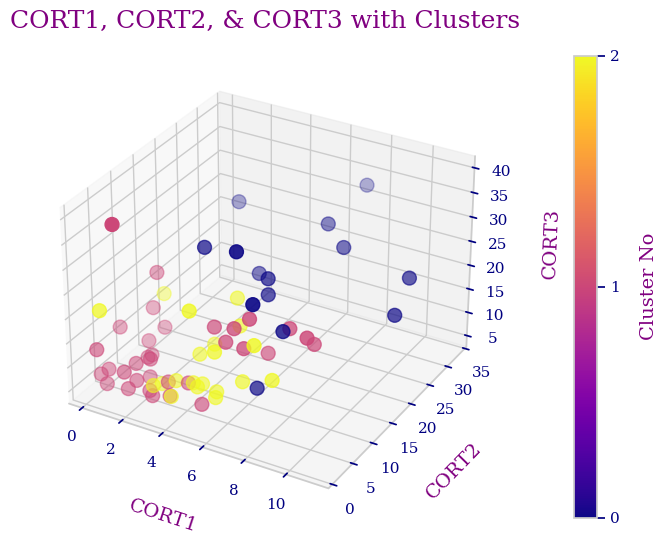

In [18]:
# Create 3D scatter plot for CORT1, 2 and 3

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['CORT1'], df['CORT2'], df['CORT3'],

                c=df['Cluster No'], cmap='plasma', s=100)



ax.set_xlabel('CORT1')

ax.set_ylabel('CORT2')

ax.set_zlabel('CORT3')

plt.title('CORT1, CORT2, & CORT3 with Clusters')



cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.1)

cbar.set_ticks([0, 1, 2])

cbar.set_label('Cluster No')



plt.show()

#fig.savefig('./3d-kmean-scatterplot.svg', format='svg', dpi=300)

### Observation:



3 Clearly visible clusters can be identify.

## Step 6: PCA (Scree Plot and Explained Variance)

In [19]:
# Perform PCA and calculate explained variance

pca = PCA()

pca_components = pca.fit_transform(scaled_features)

explained_variance = pca.explained_variance_ratio_



# Collect data for Scree Plot

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

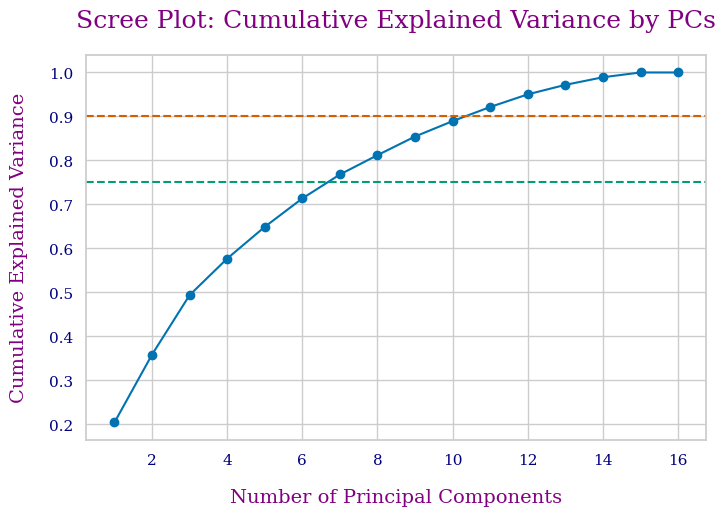

In [20]:
# Plot Scree Plot for cumulative variance

fig = plt.figure(figsize=(8, 5))

plt.plot(np.arange(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='-', color='b')

plt.title('Scree Plot: Cumulative Explained Variance by PCs')

plt.xlabel('Number of Principal Components')

plt.ylabel('Cumulative Explained Variance')

plt.axhline(y=0.90, color='r', linestyle='--')  # 90% Ideal threshold line

plt.axhline(y=0.75, color='g', linestyle='--')  # 75% Acceptable threshold line

plt.grid(True)

plt.show()

#fig.savefig('./scree-plot.svg', format='svg', dpi=300)

In [21]:
# Number of components to reach 75% variance

num_components_for_75 = np.argmax(cumulative_variance >= 0.75) + 1

print(f'Number of components to reach 75% variance: {num_components_for_75}')

Number of components to reach 75% variance: 7


### Scree Plot Observation:



The first two principal components explain about 50% of the variance, and including PC3 raises it to around 58%. A threshold of 75% explained variance would require around 7 components. This indicates that the data lacks dominant dimensions, with many features contributing to the overall variance. although, 3 features alone have shown 3 clear clusters in our data, reducing the data to only 2 or 3 PCs may not capture enough information. Therefore, we will visualize the data across all 7 PCs using pair plots. Additionally, we will create a 3D scatter plot with PC1, PC2, and PC3 as well.

## Step 7: Pairwise Plot for First 7 PCs

<Figure size 1600x1000 with 0 Axes>

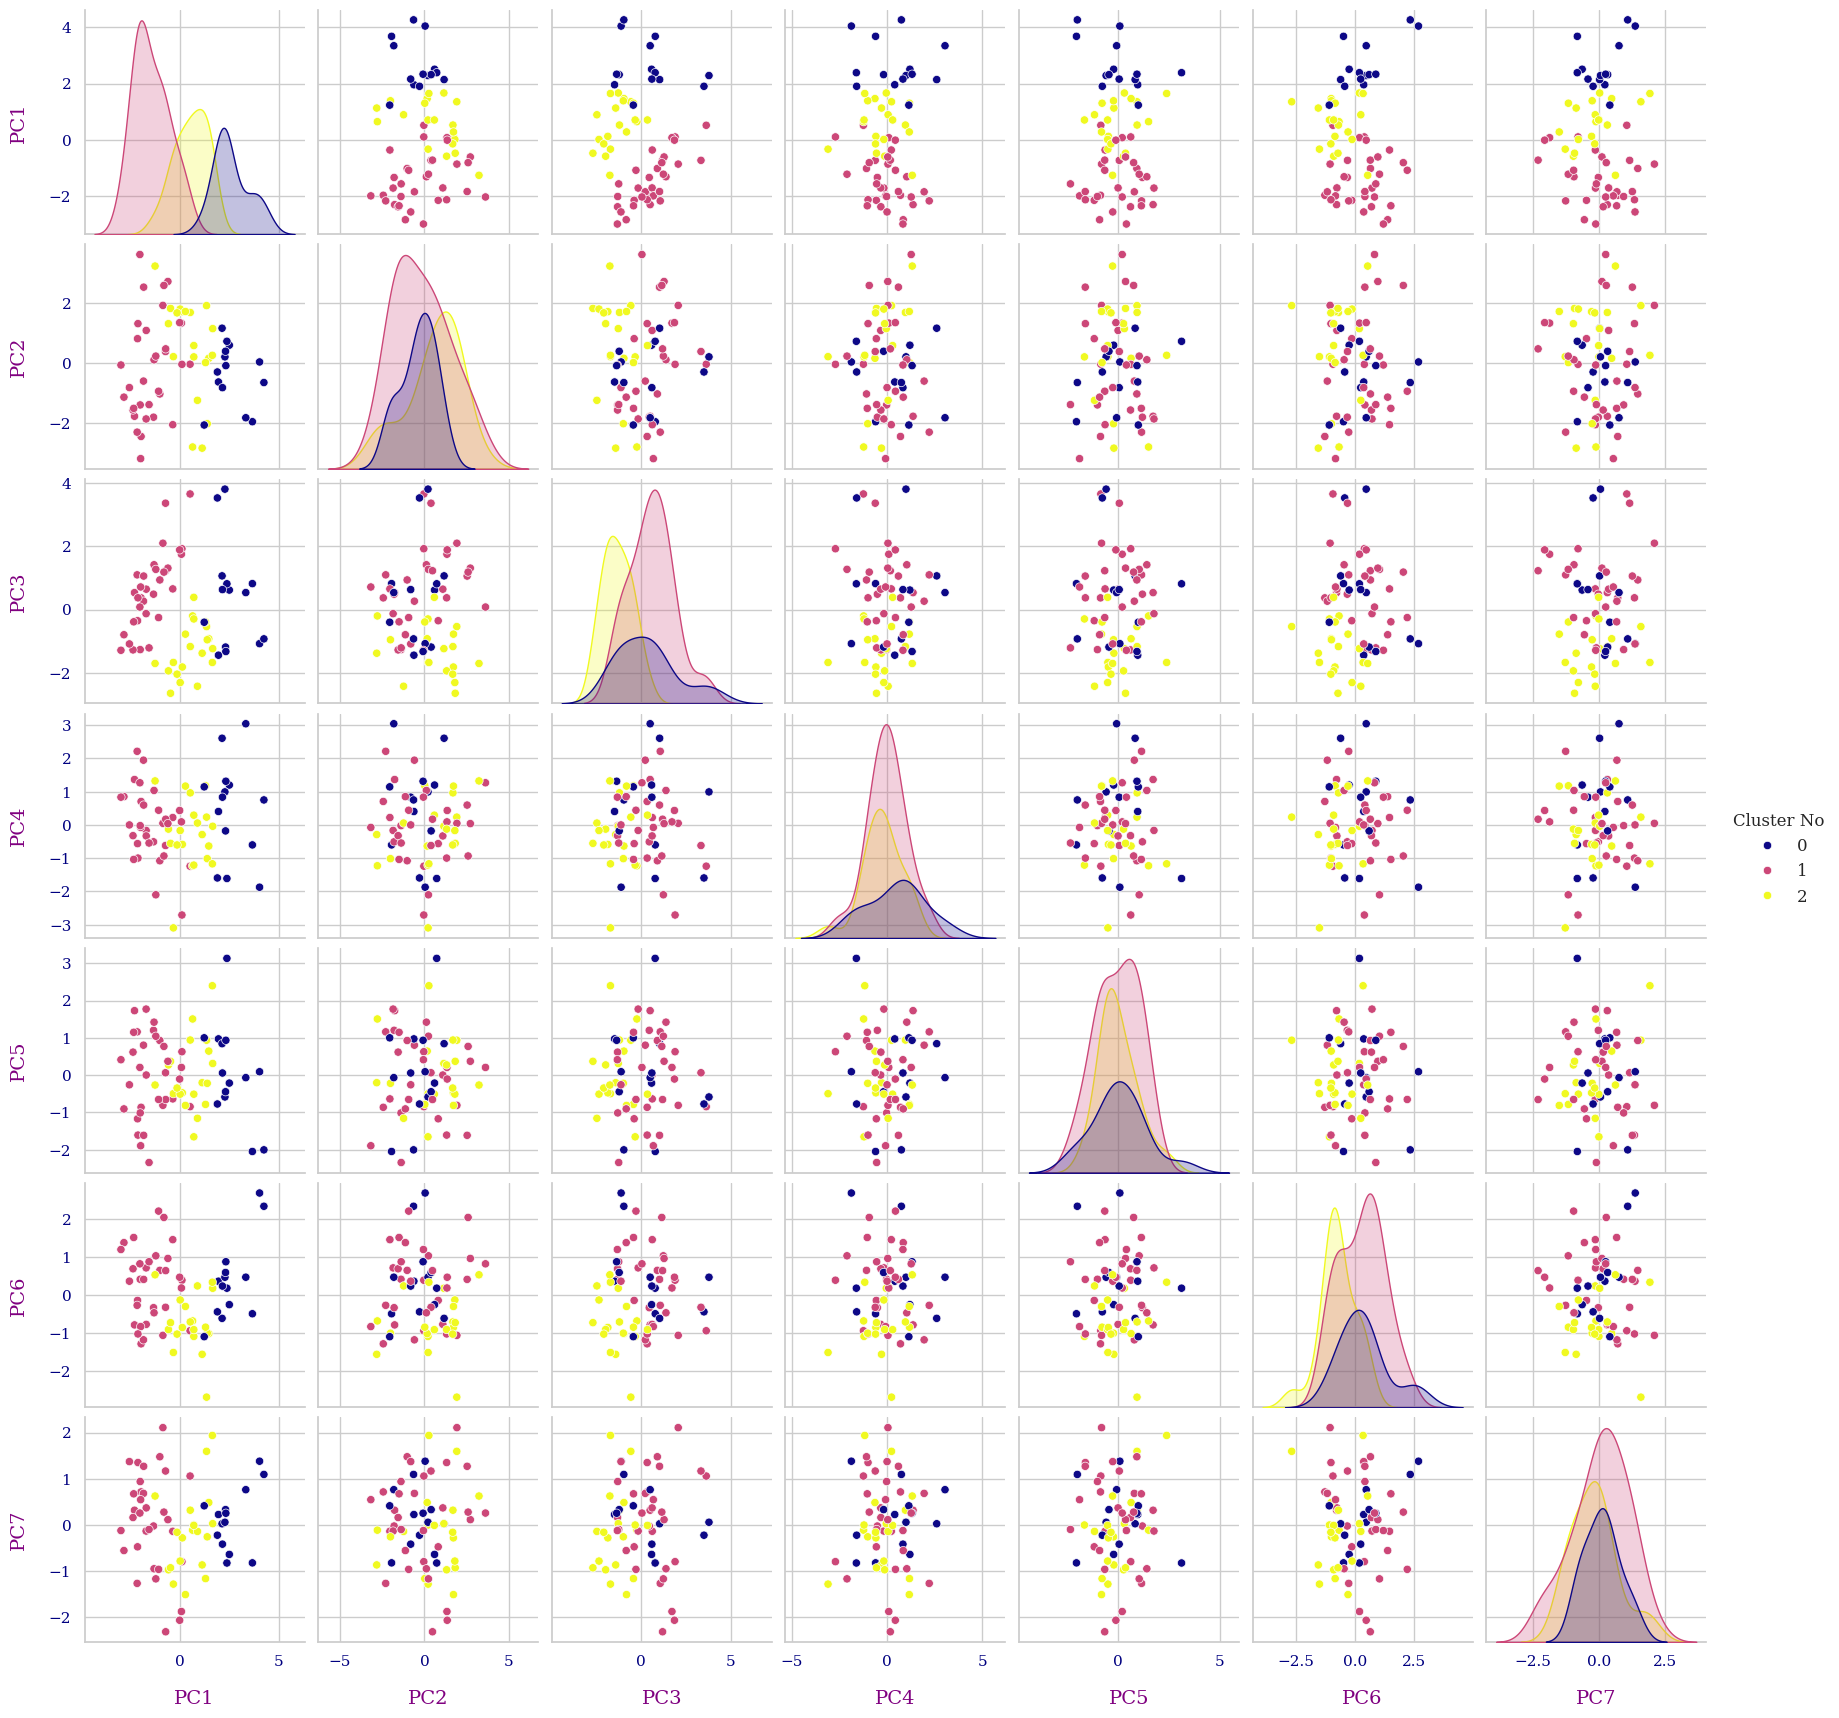

In [22]:
# Add the selected 7 principal components to the DataFrame

for i in range(0, 7):

    df[f'PC{i+1}'] = pca_components[:, i]



# Pairwise scatter plots for the first 6 PCs

fig = plt.figure(figsize=(16, 10))

sns.pairplot(df, vars=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'],

             hue='Cluster No', palette='plasma')

plt.show()

#fig.savefig('./pair-plot-7-PCs.svg', format='svg', dpi=300)

### Pair Plot Observation:



We can see when PC1 is compared with other Principal Components, it shows clear clusters. Indicating that the PC1 is the most significant contributor of the variances (Which by the definition of Principal Component is accurate).

## Step 8: 2D and 3D Plots for PC1, PC2, and PC3 with Clusters

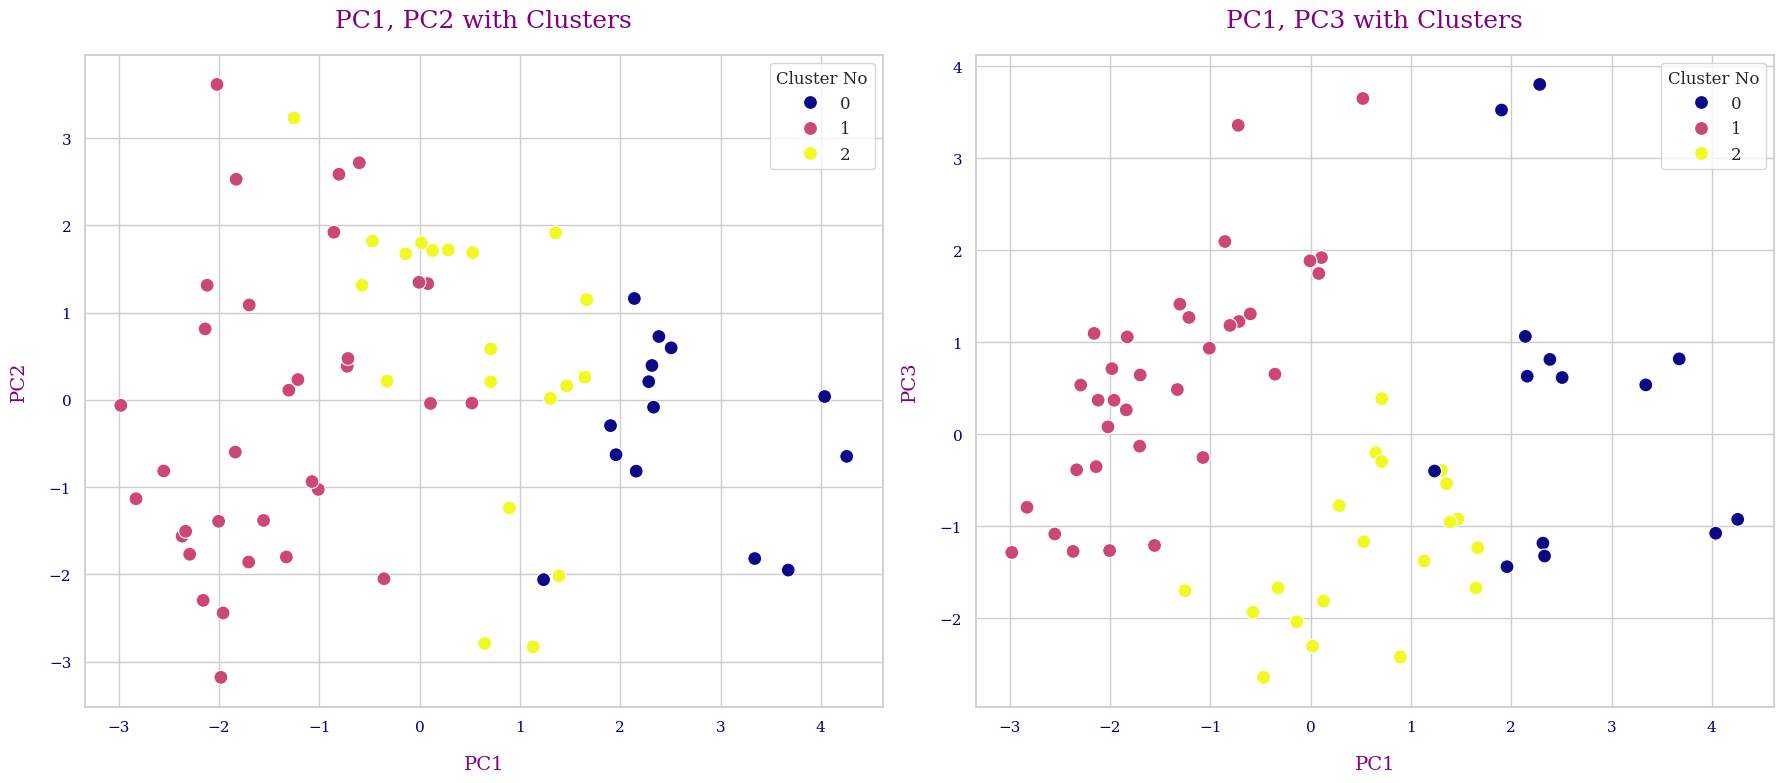

In [23]:
# Create subplots: 1 row, 3 columns

fig, axes = plt.subplots(1, 2, figsize=(18, 8))



# Plot PC1 vs PC2

sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster No',

                s=100, palette='plasma', ax=axes[0])

axes[0].set_title('PC1, PC2 with Clusters')



# Plot PC1 vs PC3

sns.scatterplot(data=df, x='PC1', y='PC3', hue='Cluster No',

                s=100, palette='plasma', ax=axes[1])

axes[1].set_title('PC1, PC3 with Clusters')



# Adjust layout to prevent overlapping

plt.tight_layout()



# Show the plot

plt.show()

#fig.savefig('./2d-scatterplot-PC1-PC2-PC3.svg', format='svg',

#            dpi=300, transparent=True)

### Plot the Scatter and Density plots for different Principal Components with Clusters

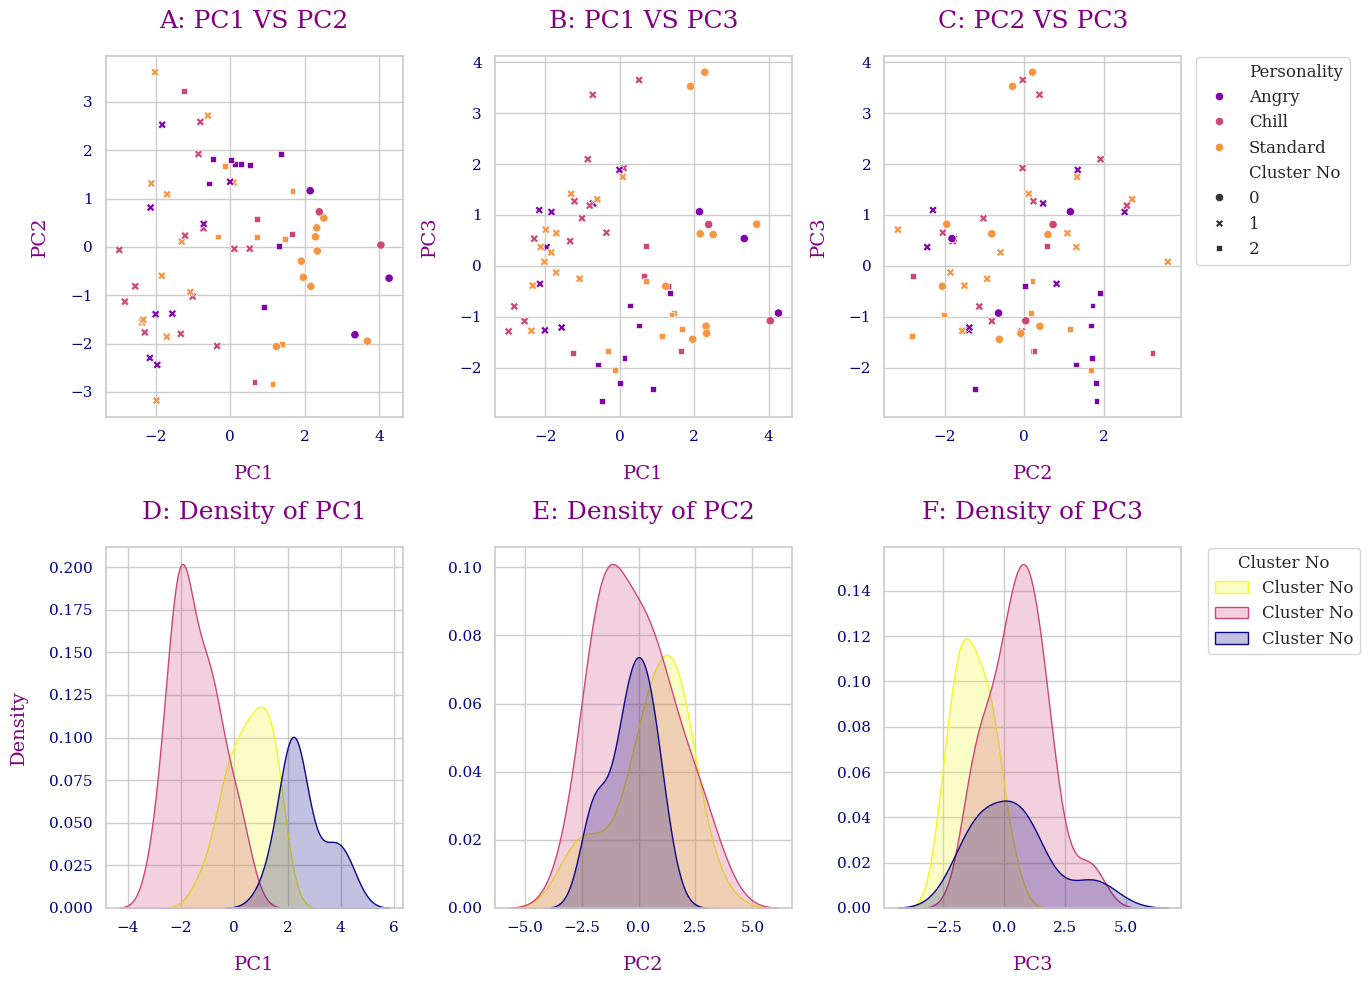

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(14, 10))



# Plot 1

sns.scatterplot(data=df, x='PC1', y='PC2', style='Cluster No',

                hue='Personality', palette='plasma', ax=axes[0, 0],

                legend=False)

axes[0, 0].set_title('A: PC1 VS PC2')

#axes[0, 0].legend().set_visible(False)



# Plot 2

sns.scatterplot(data=df, x='PC1', y='PC3', style='Cluster No',

                hue='Personality', palette='plasma', ax=axes[0, 1],

                legend=False)

axes[0, 1].set_title('B: PC1 VS PC3')

#axes[0, 1].legend().set_visible(False)



# Plot 2

sns.scatterplot(data=df, x='PC2', y='PC3', style='Cluster No',

                hue='Personality', palette='plasma', ax=axes[0, 2],

                legend=True)

axes[0, 2].set_title('C: PC2 VS PC3')

axes[0, 2].legend(bbox_to_anchor=(1.02, 1.02))



# Plot 3

sns.kdeplot(data=df, x='PC1', hue='Cluster No', label='Cluster No',

            palette='plasma', fill=True, ax=axes[1, 0], legend=False)

axes[1, 0].set_title('D: Density of PC1')



# Plot 4

sns.kdeplot(data=df, x='PC2', hue='Cluster No', label='Cluster No',

            palette='plasma', fill=True, ax=axes[1, 1], legend=False)

axes[1, 1].set_title('E: Density of PC2')

axes[1, 1].set_ylabel('')



# Plot 6

sns.kdeplot(data=df, x='PC3', hue='Cluster No',

            palette='plasma', fill=True, ax=axes[1, 2],

            legend=True, label='Cluster No')

axes[1, 2].set_title('F: Density of PC3')

axes[1, 2].set_ylabel('')

axes[1, 2].legend(title='Cluster No', bbox_to_anchor=(1.63, 1.02),

                  loc='upper right')



plt.tight_layout()

plt.show()



#fig.savefig('./PCA-with-kmean-plots.svg', format='svg',

#            dpi=300, transparent=True)

### We can see that PC1 when combined with PC3 shows distinct groups in the data.



Below we will combine PC1, PC2 & PC3 in a 3D space to see if the clusters are more prominent.

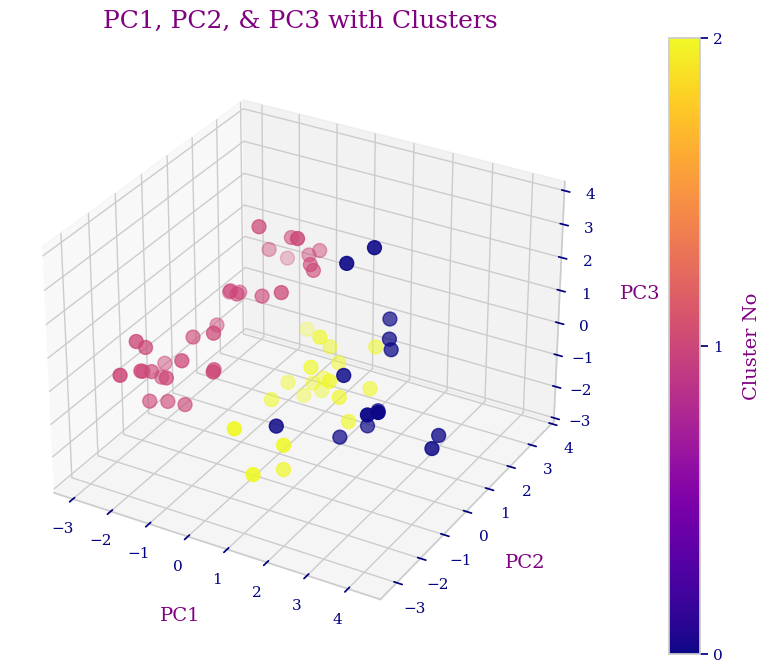

In [25]:
# Create 3D scatter plot for PC1, PC2, and PC3

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['PC1'], df['PC2'], df['PC3'], c=df['Cluster No'],

                cmap='plasma', s=100)

ax.set_xlabel('PC1')

ax.set_ylabel('PC2')

ax.set_zlabel('PC3')

cbar = plt.colorbar(sc, orientation='vertical', pad=0.1)

cbar.set_ticks([0, 1, 2])

cbar.set_label('Cluster No')

plt.title('PC1, PC2, & PC3 with Clusters')

plt.show()

#fig.savefig('./3d-scatterplot-PC1-PC2-PC3.svg', format='svg',

#            dpi=300, transparent=True)

### 3D Plot Observation: 



In the 3D scatter plot, we can observe distinct clusters in the space defined by PC1, PC2, and PC3. As more principal components are included, the clusters become more distinct, showing that additional components help capture the underlying structure of the data. However, while it's evident that adding more PCs could further distinguish the clusters, we are limited in visualizing beyond three dimensions.

## Applying KMean again on PCA Components.

In [26]:
df_PC_columns = df[['PC1','PC2','PC3','PC4','PC5','PC6','PC7']]

In [27]:
# Apply K-Means Clustering with 3 clusters

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')



df['KClusters'] = kmeans.fit_predict(df_PC_columns) # Fits the model and assigns cluster labels

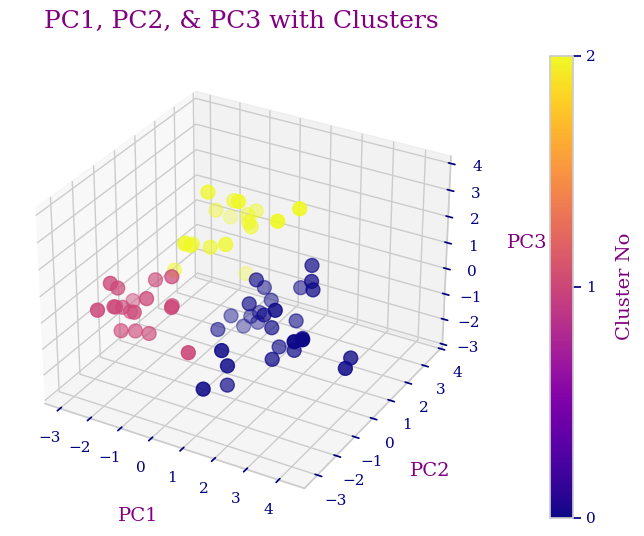

In [28]:
# Create 3D scatter plot for CORT1, 2 and 3

fig = plt.figure(figsize=(10, 6))

ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['PC1'], df['PC2'], df['PC3'],

                c=df['KClusters'], cmap='plasma', s=100)



ax.set_xlabel('PC1')

ax.set_ylabel('PC2')

ax.set_zlabel('PC3')

plt.title('PC1, PC2, & PC3 with Clusters')



cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.1)

cbar.set_ticks([0, 1, 2])

cbar.set_label('Cluster No')



plt.show()

### Now the KMean is aligned with the Clusters based on our Principal Component Analysis